In [ ]:
# Copyright (c) 2020-2021 CertifAI Sdn. Bhd.
# 
# This program is part of OSRFramework. You can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
# 
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Predict house price using Linear Regression

## 1 - Import necessary packages

Let's first import all the packages that you will need during this assignment.

- **numpy** is the main package for scientific computing with Python.
- **matplotlib** is a library to plot graphs in Python.
- **sklearn** features various algorithms of machine learning in Python.
- **pandas** is a high-level data manipulation tool in Python.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Load dataset

Let's load our sample dataset which is provided by sklearn.

In [2]:
bhouse = datasets.load_boston()

`dir()` method tries to return a list of valid attributes of the object.

In [3]:
dir(bhouse)

['DESCR', 'data', 'feature_names', 'filename', 'target']

**DESCR**: str
<br>
The full description of the dataset.

**data**: ndarray of shape
<br>
The data matrix.

**feature_names**: ndarray
<br>
The names of the features.

**filename**: str
<br>
The physical location of boston csv dataset.

**target**: ndarray of shape
<br>
The regression target.

Check the number of data.

In [4]:
bhouse.target.shape

(506,)

Check feature names

In [5]:
# TODO: Replace {} with your solution to check feature names
bhouse.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Load features and targets

In [6]:
# TODO: Replace {} with your solution to load features to "data"
data = bhouse.data.astype(np.float32)

# TODO: Replace {} with your solution to load targets to "target"
target = bhouse.target.astype(np.float32)

Split the dataset

In [7]:
# TODO: Replace {} with your solution to split the dataset into training and testing subset with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 123)

## 3 - Linear Regression

Load linear regression model

In [8]:
# TODO: Replace {} with your solution to Load Linear Regression Model
model = LinearRegression()

Fit the model with training data

In [9]:
# TODO: Replace {} with your solution to fit the training data into the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print out the coefficients.
- A positive coefficient means as the value of the independent variable increases, the dependent variable also tends to increase. 
- A negative coefficient means as the value of the independent variable increases, the dependent variable tends to decrease.

In [10]:
# TODO: Replace {} with your solution to print out the coefficients
print(model.coef_)

[-1.0099470e-01  3.9959617e-02  7.5374722e-02  2.6453340e-01
 -1.4340807e+01  4.8331847e+00 -7.4416315e-03 -1.3267391e+00
  2.7349865e-01 -1.3044141e-02 -9.5662522e-01  6.4245202e-03
 -4.8656836e-01]


> The coefficients are the weights.

In [11]:
print(len(model.coef_))

13


> There are 13 coefficients because there are 13 columns of features.

Print out the intercept.

In [12]:
# TODO: Replace {} with your solution to print out the intercept
print(model.intercept_)

28.981285


> The intercept of the equation is also the bias.

## 4 - Predict using the model

Predict the results by using the trained model

In [13]:
# TODO: Replace {} with your solution to predict the result using the traiined model
# Input data is the test dataset.
predictions = model.predict(X_test)

Plot the result.

Text(0, 0.5, 'Predicted Y')

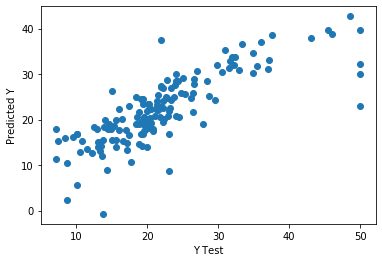

In [14]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 5 - Evaluating the model

RMSE, MSE and MAE are the common metrics used to evaluate a regression model.
- MAE : Mean absolute error regression loss
- MSE : Mean squared error regression loss
- RMSE : Square root of Mean squared error regression loss

Print out the MAE, MSE, RMSE.

In [15]:
# TODO: Replace {} with your solution to print out MAE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# TODO: Replace {} with your solution to print out MSE
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# TODO: Replace {} with your solution to print out RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6913645
MSE: 28.405916
RMSE: 5.32972


# Exercise: Predict medical cost

> Dataset from Kaggle: [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance/notebooks)

## 1 - Load Dataset

In [16]:
df = pd.read_csv("data/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [17]:
# TODO: Replace {} with your solution to check the shape of the dataset
df.shape

(1338, 7)

> This dataset has 1338 examples with 7 features

Make sure the dataset has no null value.

In [18]:
# TODO: Replace {} with your solution to check whether the dataset contains null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Display the features and target.

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Features:

- age: age of the patient.
- sex: sex of the patient.
- bmi: bmi of the patient.
- children: is the patient a child.
- smoker: is the patient a smoker.
- region: region where the patient lived.

Target:

- charges: medical cost charged on the patient.


Change categorical data into binary.

In [20]:
dummies = pd.get_dummies(df[['sex', 'smoker', 'region']], drop_first=True) 
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)
df.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


Load the features into 'x' and the targets into 'y'.

In [21]:
x = df.drop(['charges'], axis=1)
y = df.charges

Split the dataset into training set and test set with ratio 7:3

In [22]:
# TODO: Replace {} with your solution to split the dataset into 70% training set and 30% test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

## 2 - Linear Regression

In [23]:
# TODO: Replace {} with your solution to load the linear regression model
model = LinearRegression()

# TODO: Replace {} with your solution to fit the training data into model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print the model's coefficients.
- A positive coefficient means as the value of the independent variable increases, the dependent variable also tends to increase. 
- A negative coefficient means as the value of the independent variable increases, the dependent variable tends to decrease.

In [24]:
for i in range(len(x.columns)):
    print(x.columns[i], model.coef_[i])

age 257.62272586522306
bmi 348.4255104731627
children 477.34190109098887
sex_male -93.42829510380442
smoker_yes 23723.599543558314
region_northwest -561.1875761821872
region_southeast -1068.6186857453763
region_southwest -1126.0510592352573


Model's coefficients analysis:
- 'smoker_yes' has very high positive coefficient, which means that if the patient is smoker, then the cost charges on the patient will increase.
- 'sex_male' has negative coefficient, which means that if the patient is male, then the cost charges on the patient will decrease.

Print the intercept.

In [25]:
print(model.intercept_)

-11977.343587388663


## 3 - Evaluate Model

In [26]:
# # TODO: Replace {} with your solution to make prediction with test set
predictions = model.predict(x_test)

Plot the results.

Text(0, 0.5, 'Predicted Y')

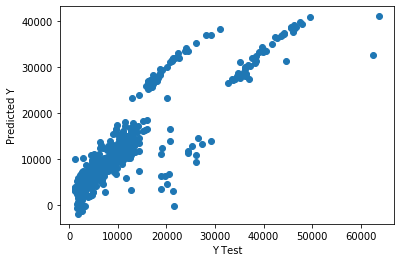

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Print the model's score.

In [28]:
print(model.score(x_test, y_test))

0.7627582187528817


Print the MAE, MSE, RMSE of the model.

In [29]:
# TODO: Replace {} with your solution to print out MAE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# TODO: Replace {} with your solution to print out MSE
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# TODO: Replace {} with your solution to print out RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4196.20111465503
MSE: 33892347.118696496
RMSE: 5821.713417774573


- MAE is less biased for higher values and may not adequately reflect the performance when dealing with larger error values. MAE also does not necessarily penalize large errors.
- MSE is higly biased for higher values and it penalize large errors.
- RMSE works better in reflecting performance when dealing with larger error values. RMSE also penalize large errors.

In this case, RMSE is better to be the evaluation metric for the error analysis.